In [47]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

In [160]:
def A(t, n):
    return n * np.log(1 + np.exp(t))
    
def A_cp(t, n):
    return n * cp.logistic(t)
    
def objective(n, theta_0, v, alpha, q):
    return (
        (A(theta_0 + q * v, n) - A(theta_0, n))
        - q * ((A(theta_0 + v, n) - A(theta_0, n)) + np.log(alpha))
    ) / (q-1)
    
def qcp_solve(n, theta_0, v, alpha):
    shift = (A(theta_0 + v, n) - A(theta_0, n)) + np.log(alpha)
    q = cp.Variable(pos=True)
    objective_fn = (
        (A_cp(theta_0 + (q+1) * v, n) - A(theta_0, n))
        - (q+1) * shift
    ) / q
    objective = cp.Minimize(objective_fn)
    problem = cp.Problem(objective)
    min = 0
    max = n * v - shift
    problem.solve(qcp=True, low=min+1e-6, high=max)
    return q.value + 1, problem.value

In [161]:
n = 350
theta_0 = -1
vs = np.linspace(0, 1, 100)
alpha = 0.025

/Users/jhyang/opt/miniconda3/envs/confirm/lib/python3.10/site-packages/cvxpy/problems/problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/jhyang/opt/miniconda3/envs/confirm/lib/python3.10/site-packages/cvxpy/problems/problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/jhyang/opt/miniconda3/envs/confirm/lib/python3.10/site-packages/cvxpy/problems/problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


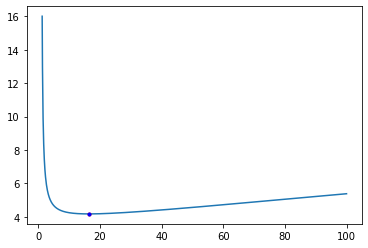

In [162]:
# cvxpy method
v = vs[2]
opt_q, opt_loss = qcp_solve(n, theta_0, v, alpha)

# brute force search method
qs = np.linspace(1.3, 100, 1000)
objs = np.array([objective(n, theta_0, v, alpha, q) for q in qs])
i_min = np.argmin(objs)

# plot
plt.plot(qs, objs)
plt.plot(qs[i_min], objs[i_min], 'r.')
plt.plot(opt_q, opt_loss, 'b.')